In [68]:
from io import BytesIO

import cairo
import IPython.display
import math

In [130]:
def circle(ctx, x, y):
    ctx.set_line_width(0.45)
    ctx.arc(x, y, 0.22, 0, 2*math.pi)
    ctx.stroke()

In [138]:
def circle_row(ctx, n, x_origin, y_origin):
    for c in range(n):
        circle(ctx, x_origin + c, y_origin)

In [202]:
def triangle_numbers(ctx, n):
    x = n
    y = n
    for r in range(1, n + 1):
        xoffset = 1 + (n * 0.55) - (r / 2) # + (n / 4)
        circle_row(ctx, r, xoffset, r)

In [284]:
def draw_triangle_numbers(n):
    svg = BytesIO()
    size = n * 14 + 60
    size = size if size < 300 else 300
    with cairo.SVGSurface(svg, size + 50, size) as surface:
        ctx = cairo.Context(surface)
        scale = 25 - n
        scale = scale if scale > 10 else 10
        ctx.scale(scale, scale)
        triangle_numbers(ctx, n)

    return svg

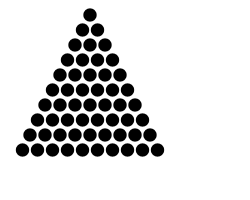

In [289]:
svg = draw_triangle_numbers(10)
IPython.display.SVG(data=svg.getvalue())